In [1]:
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWa

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged1.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [4]:
dataset = dataset.iloc[:500,1:18]
dataset.head(20)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,182,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,138,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,46,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,51,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,75,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,131,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,301,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [5]:
x = dataset.iloc[:,1:17]
x.head(10)

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [6]:
y = dataset['cnt']
y.head(10)

0    182
1    138
2    134
3     72
4     47
5     46
6     51
7     75
8    131
9    301
Name: cnt, dtype: int64

In [7]:
print(x.shape)
print(y.shape)

(500, 16)
(500,)


In [8]:
#Random Selection
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(x, y,test_size=0.2, random_state=33)

In [9]:
#Data Normalization
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(train_x_disorder)
test_x_disorder = ss_x.transform(test_x_disorder)

In [10]:
train_x_disorder

array([[-0.3606807 , -0.68629799, -1.0461345 , ..., -0.19738551,
        -0.61588176,  0.        ],
       [ 0.18017133, -0.21942861, -1.92145913, ..., -0.19738551,
        -0.61588176,  0.        ],
       [ 0.18017133,  0.01400608, -2.11597571, ..., -0.19738551,
        -0.61588176,  0.        ],
       ...,
       [ 1.5323014 ,  1.88148362,  1.09354792, ..., -0.19738551,
        -0.61588176,  0.        ],
       [-1.84802377, -1.73675411,  1.9202434 , ..., -0.19738551,
        -0.61588176,  0.        ],
       [-0.90153272, -0.21942861,  1.57983938, ..., -0.19738551,
         1.62368828,  0.        ]])

In [11]:
#Thickening matrix
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

In [12]:
#bias
def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

In [13]:
#Convolution
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

In [14]:
def max_pool_2X2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'SAME')

In [15]:
#define placeholder for inputs to network
xs = tf.placeholder(tf.float32,[None,16])
ys = tf.placeholder(tf.float32,[None,1])

In [16]:
keep_prob = tf.placeholder(tf.float32)

In [17]:
x_image = tf.reshape(xs,[-1,4,4,1])#The original data 16 becomes a two-dimensional picture 2*4

In [18]:
#conv1 layer 
W_conv1 = weight_variable([2,2,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1 = max_pool_2X2(h_conv1)  #Double the length and width

In [19]:
#conv2 layer
W_conv2 = weight_variable([2,2,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_conv1,W_conv2)+b_conv2)

In [20]:
#full connection
#pull a 3D image with 4*4*64 into an one dimensional array of length 512
W_fc1 = weight_variable([4*4*64,512])
b_fc1 = bias_variable([512])

In [21]:
h_pool2_flat = tf.reshape(h_conv2,[-1,4*4*64]) #Dimensional Reduction
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob) #drop keep_prob element

In [22]:
#fc2 layer,full connection
W_fc2 = weight_variable([512,1])
b_fc2 = bias_variable([1])

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [24]:
#calculation results
#prediction = tf.matmul(h_fc1_drop,W_fc2)+b_fc2
prediction = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices = [1]))
cross_entropy = tf.sqrt(cross_entropy)

#Accuracy
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(ys, 1))
acc = tf.reduce_mean(tf.cast(correct_prediction, "float"))

#learning rate
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
train_x_disorder = train_x_disorder.reshape([-1,1])
train_y_disorder = train_y_disorder.reshape([-1,1])

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [27]:
train_x_disorder = np.reshape(train_x_disorder,(-1,16))

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [29]:
#f1_score
model_pred = tf.argmax(prediction, 1)
model_True=tf.argmax(train_y_disorder,1)

In [30]:
for i in range(100):
    sess.run(train_step,feed_dict = {xs:train_x_disorder,ys:train_y_disorder,keep_prob:0.7})
    print(i,"RMSE =",sess.run(cross_entropy,feed_dict = {xs:train_x_disorder,ys:train_y_disorder,keep_prob:1.0}))
    #print("ACC =",sess.run(acc,feed_dict = {xs:train_x_disorder,ys:train_y_disorder,keep_prob:1.0}))

0 RMSE = 1138.5259
1 RMSE = 1092.0543
2 RMSE = 1008.0869
3 RMSE = 894.5408
4 RMSE = 826.7494
5 RMSE = 931.77356
6 RMSE = 904.7656
7 RMSE = 838.3628
8 RMSE = 820.75165
9 RMSE = 839.3516
10 RMSE = 859.293
11 RMSE = 866.39075
12 RMSE = 859.82306
13 RMSE = 843.39276
14 RMSE = 824.6222
15 RMSE = 814.5974
16 RMSE = 821.01917
17 RMSE = 834.44763
18 RMSE = 836.1902
19 RMSE = 824.43024
20 RMSE = 813.3147
21 RMSE = 811.3815
22 RMSE = 816.30225
23 RMSE = 821.2245
24 RMSE = 822.1082
25 RMSE = 818.11414
26 RMSE = 811.91156
27 RMSE = 807.475
28 RMSE = 807.5099
29 RMSE = 810.94977
30 RMSE = 812.89526
31 RMSE = 810.49945
32 RMSE = 806.33905
33 RMSE = 804.345
34 RMSE = 805.34064
35 RMSE = 807.1358
36 RMSE = 807.43176
37 RMSE = 805.66174
38 RMSE = 802.8887
39 RMSE = 801.0353
40 RMSE = 801.0548
41 RMSE = 801.91125
42 RMSE = 801.5907
43 RMSE = 799.86285
44 RMSE = 798.2158
45 RMSE = 797.6388
46 RMSE = 797.81335
47 RMSE = 797.822
48 RMSE = 796.9023
49 RMSE = 795.44324
50 RMSE = 794.3768
51 RMSE = 794.04456


In [31]:
test_x_disorder = test_x_disorder.reshape([-1,1])
test_y_disorder = test_y_disorder.reshape([-1,1])

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [32]:
test_x_disorder = np.reshape(test_x_disorder,(-1,16))

In [33]:
#visualization
prediction_value = sess.run(prediction,feed_dict = {xs:test_x_disorder,ys:test_y_disorder,keep_prob:1.0})

In [34]:
prediction_value

array([[ 400.1947 ],
       [ 740.9261 ],
       [ 861.4512 ],
       [1070.8514 ],
       [1435.004  ],
       [ 843.065  ],
       [ 741.65247],
       [1142.0863 ],
       [1184.6857 ],
       [ 567.6517 ],
       [ 857.8437 ],
       [ 719.75055],
       [1032.2317 ],
       [ 924.4725 ],
       [1300.9124 ],
       [ 661.58856],
       [1205.4492 ],
       [1103.0021 ],
       [ 840.6611 ],
       [1104.8761 ],
       [ 763.0766 ],
       [ 743.37726],
       [ 709.9672 ],
       [ 451.48624],
       [ 948.2729 ],
       [ 794.415  ],
       [ 643.461  ],
       [ 864.0942 ],
       [1286.8334 ],
       [ 809.8837 ],
       [ 744.42316],
       [1086.9767 ],
       [ 431.11618],
       [1184.6296 ],
       [ 470.60455],
       [ 401.92688],
       [ 542.3084 ],
       [1122.9764 ],
       [1134.9198 ],
       [ 489.19315],
       [1028.8127 ],
       [ 497.44995],
       [1149.0875 ],
       [1361.772  ],
       [ 827.936  ],
       [ 869.6947 ],
       [1126.4761 ],
       [ 876.

In [35]:
import matplotlib.pyplot as plt

In [36]:
fig = plt.figure(figsize = (20,3))
axes = fig.add_subplot(1,1,1)

In [37]:
line1, = axes.plot(range(len(prediction_value)),prediction_value,'b--',label = 'CNN',linewidth = 2)

In [38]:
line2, = axes.plot(range(len(test_y_disorder)),test_y_disorder,'g',label = "TRUE")

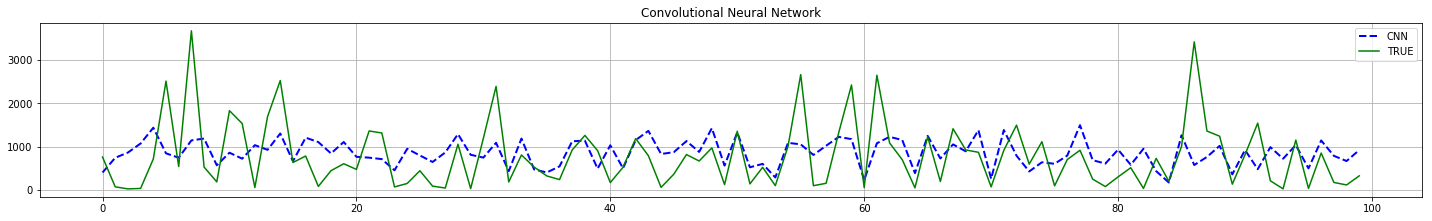

In [39]:
axes.grid()
fig.tight_layout()
plt.legend(handles = [line1,line2])
plt.title("Convolutional Neural Network")
plt.show()

In [43]:
def compute_accuracy(v_xs,v_ys):
    global prediction
    y_pre = sess.run(prediction,feed_dict={xs:v_xs,keep_prob:1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict = {xs:v_xs,ys:v_ys,keep_prob:1})
    return result

In [44]:
compute_accuracy(test_x_disorder,test_y_disorder)

1.0